In [1]:
pip install ibm_watson_machine_learning

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"VyK2X_zv-UgniBzlyDlXgR1vEWGP99vSVHcmcaLT1pNA"
}
client = APIClient(wml_credentials)

DEPRECATED!! Python 3.6 framework is deprecated and will be removed on Jan 20th, 2021. It will be read-only mode starting Nov 20th, 2020. i.e you won't be able to create new assets using this client. Use Python 3.7 instead. For details, see https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [4]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [5]:
space_uid=guid_from_space_name(client,'nutrition_image')
print("Space UID="+space_uid)

Space UID=f861e4a9-9152-4393-aedb-c564a88a9473


In [6]:
client.set.default_space(space_uid)

'SUCCESS'

In [7]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [8]:
client.repository.download('cc6526e9-b2d0-4d2b-b736-92b42db4ba78','model.tar.gz')

Successfully saved model content to file: 'model.tar.gz'


'D:\\data science\\Nutrition Analysis Using Image Classification\\IBM deployment files/model.tar.gz'

# Testing

In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing  import image
import numpy as np
model = load_model("model/nutrition.h5")

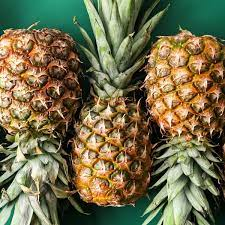

In [10]:
from IPython.display import Image
img=Image(filename=r"D:\data science\Nutrition Analysis Using Image Classification\Flask\Sample_Images\Test_Image5.jpg")
img

In [11]:
from tensorflow.keras.preprocessing  import image
path2=r"D:\data science\Nutrition Analysis Using Image Classification\Flask\Sample_Images\Test_Image5.jpg"

img = image.load_img(path2,target_size = (64,64))


In [12]:
x = image.img_to_array(img)#image to array
x = np.expand_dims(x,axis = 0)#changing the shape
pred = np.argmax(model.predict(x))#predicting the classes
pred

3

In [13]:
index=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
result=str(index[pred])
result

'PINEAPPLE'